In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin-1')

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


<AxesSubplot:>

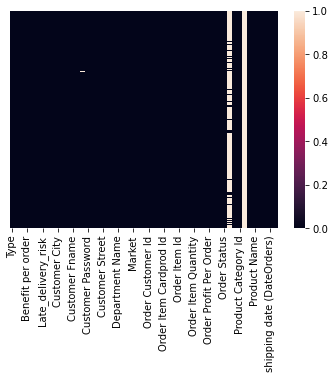

In [14]:
sns.heatmap(df.isnull(),yticklabels=False)

In [18]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [27]:
len(df[df['Order Zipcode'].isnull()==True])

#order zipcode and Product Description are null mostly

155679

In [35]:
df['Customer City'].index

RangeIndex(start=0, stop=180519, step=1)

In [43]:
df.iloc[0,0]

'DEBIT'

In [48]:
df.loc[:,'Type']

0            DEBIT
1         TRANSFER
2             CASH
3            DEBIT
4          PAYMENT
            ...   
180514        CASH
180515       DEBIT
180516    TRANSFER
180517     PAYMENT
180518     PAYMENT
Name: Type, Length: 180519, dtype: object

In [59]:
df.loc[:,('Order Zipcode','Customer City')]

,Order Zipcode,Customer City
0,NaN,Caguas
1,NaN,Caguas
2,NaN,San Jose
3,NaN,Los Angeles
4,NaN,Caguas
...,...,...
95,NaN,Caguas
96,NaN,Caguas
97,NaN,Caguas
98,NaN,Caguas


In [58]:
df['Shipping Mode'].nunique()

4

In [64]:
sum(df['Order Zipcode'].isnull())

155679

In [88]:
def func(x):
    
    count=sum(x.isnull())
    return count
    

In [90]:
df.apply(func)

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [91]:
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

In [93]:
data=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)

In [94]:
data.shape

(180519, 42)

<AxesSubplot:>

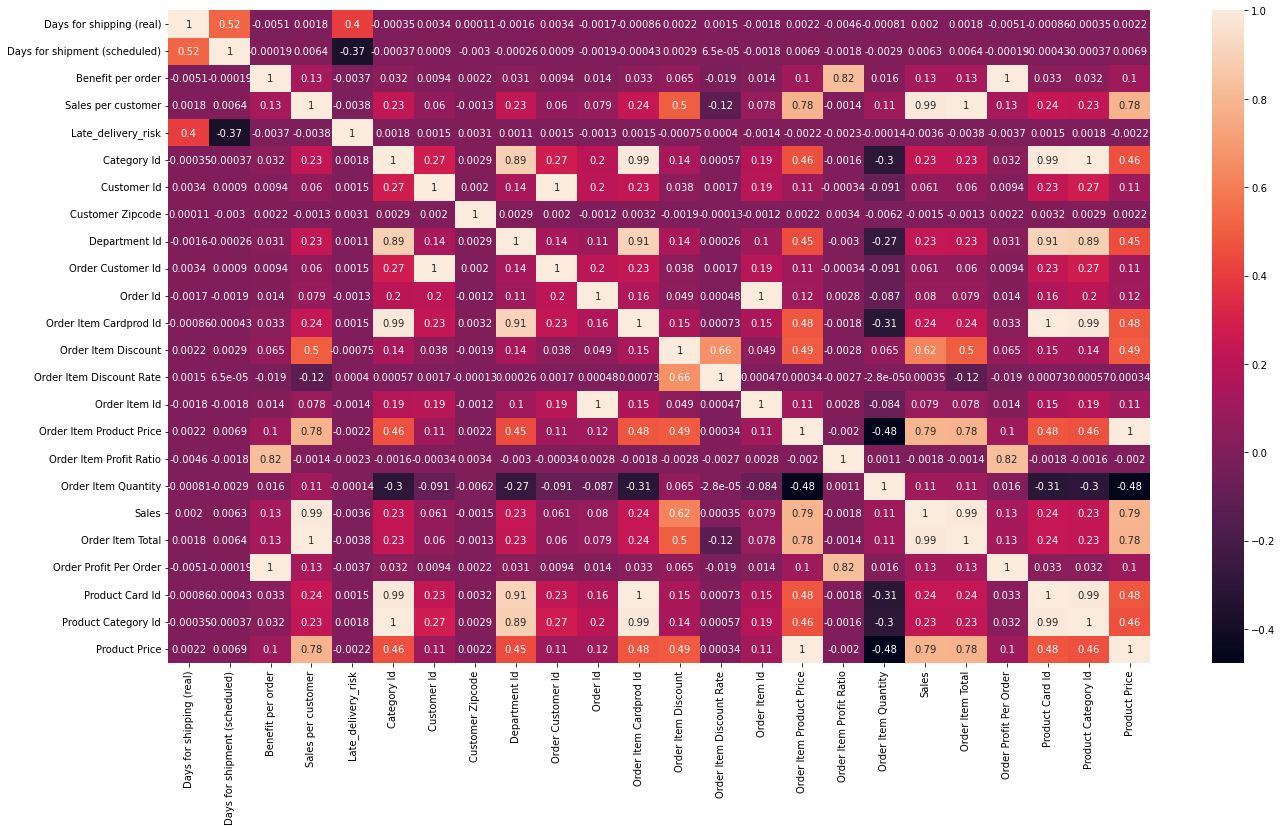

In [99]:
plt.figure(figsize=(22,12))
sns.heatmap(data.corr(),annot=True)

In [100]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class,OrliHendricks


In [107]:
data['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [ ]:
market = data.groupby('Market') 
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.barh(figsize=(12,6), title="Total sales for all markets",color='coral')

<AxesSubplot:title={'center':'Total sales for all markets'}, ylabel='Market'>

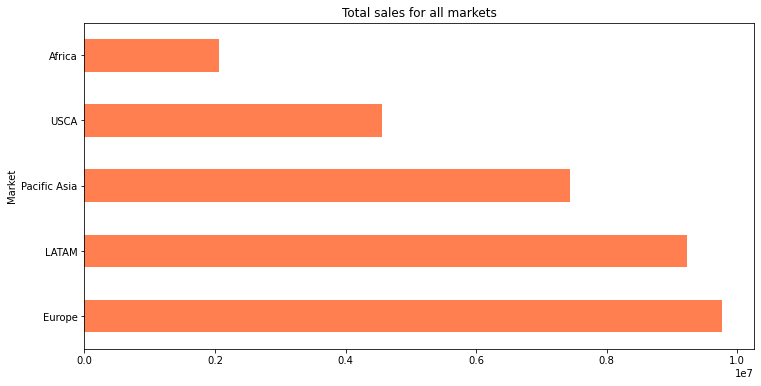

In [114]:
market = data.groupby('Market') 
plt.figure(figsize=(12,6))
market['Sales per customer'].sum().sort_values(ascending=False).plot.barh(title='Total sales for all markets',color='coral')

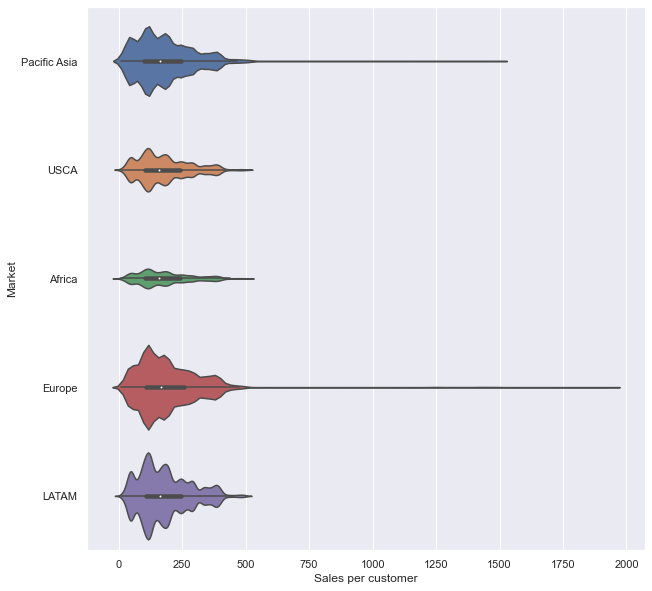

In [115]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.violinplot(x='Sales per customer',y='Market',data=data,orient ="h",scale="count",title="Total sales for all markets")

<AxesSubplot:title={'center':'Total sales for all regions'}, ylabel='Order Region'>

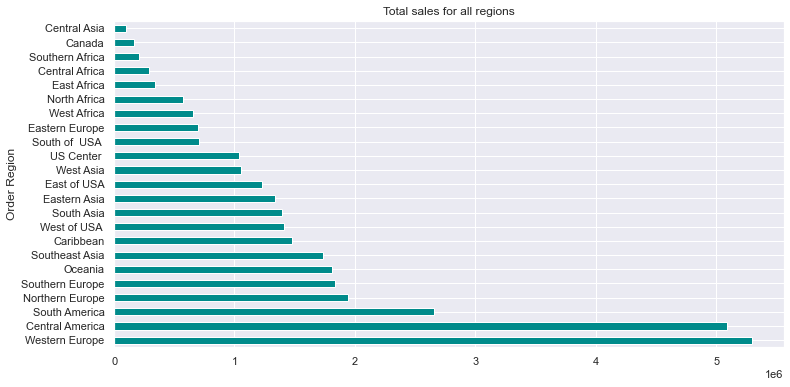

In [116]:
region = data.groupby('Order Region')
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.barh(figsize=(12,6), title="Total sales for all regions",color='darkcyan')

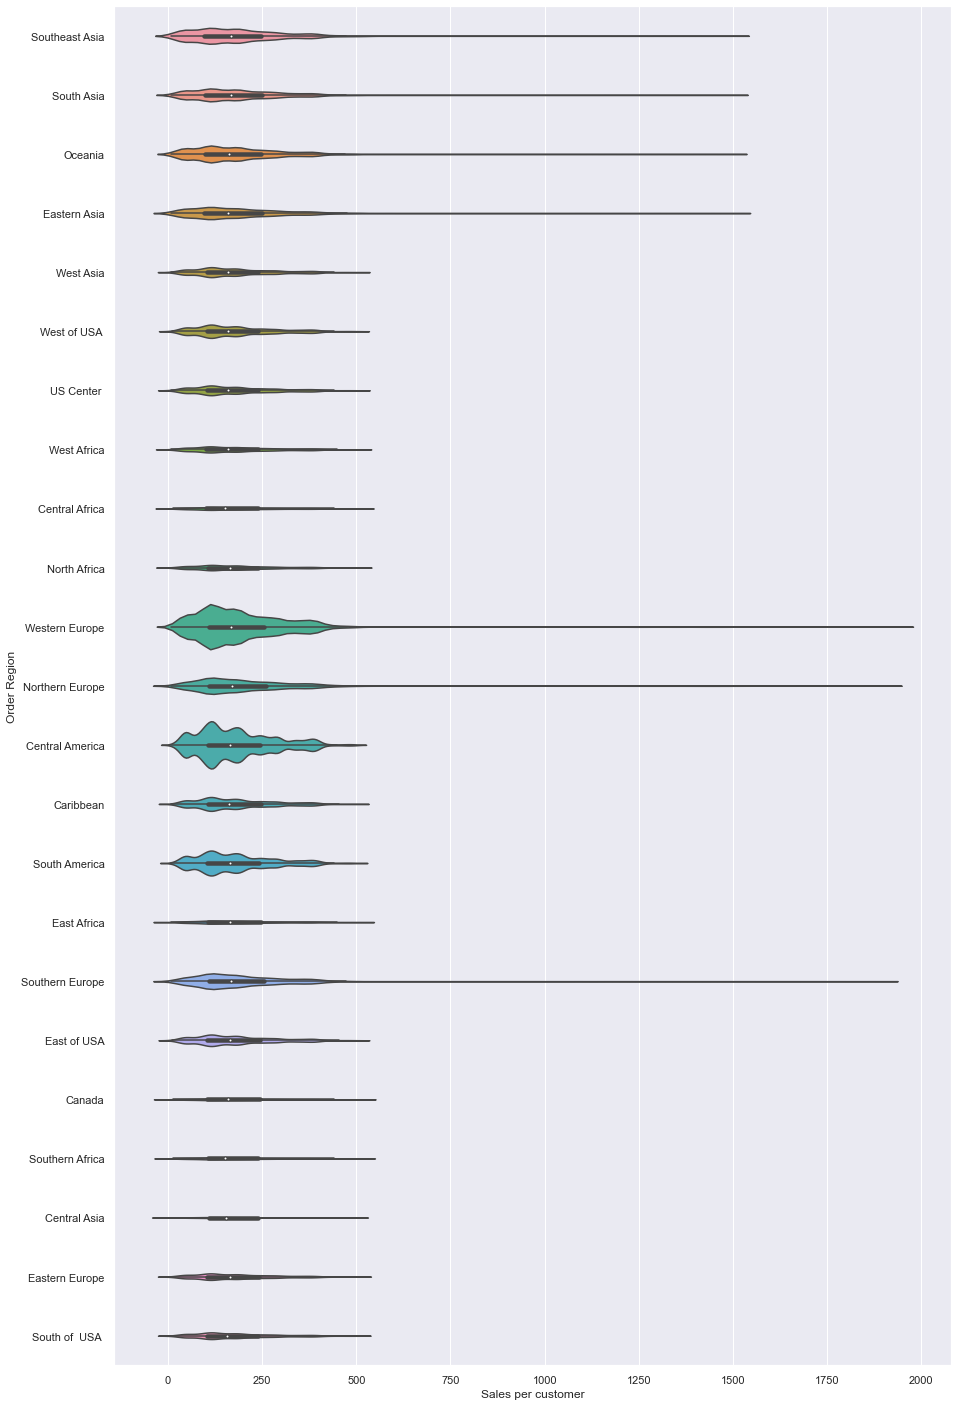

In [117]:
sns.set(rc={'figure.figsize':(15,25)})
ax = sns.violinplot( x ='Sales per customer', y='Order Region', data=data, orient ="h",scale="count")

<AxesSubplot:title={'center':'Total sales'}, ylabel='Category Name'>

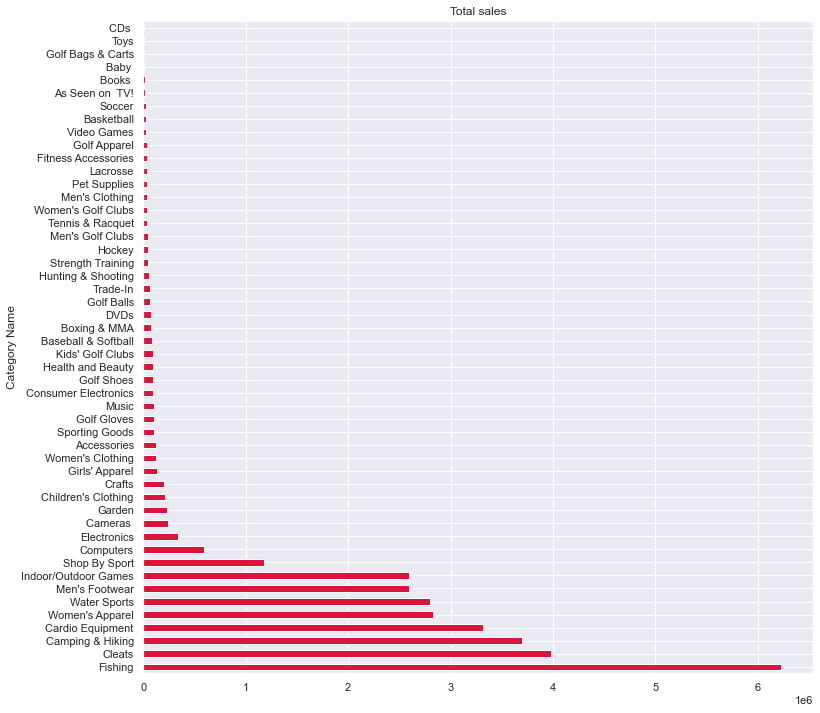

In [118]:
#Grouping all categories
cat = data.groupby('Category Name')
plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.barh(figsize=(12,12), title="Total sales",color='crimson')

<AxesSubplot:title={'center':'Average sales'}, ylabel='Category Name'>

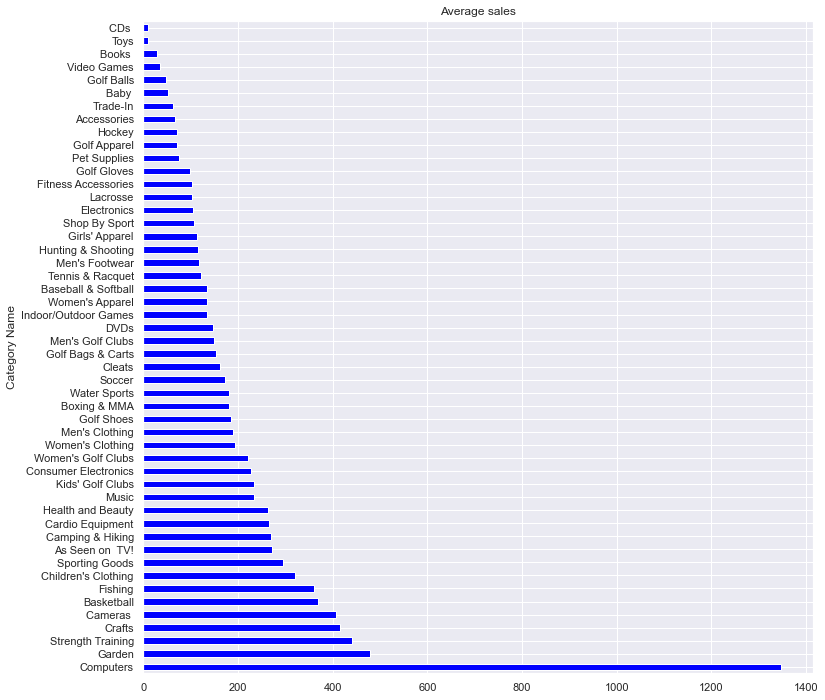

In [119]:
# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.barh(figsize=(12,12), title="Average sales",color='blue')

<AxesSubplot:title={'center':'Average price'}, ylabel='Category Name'>

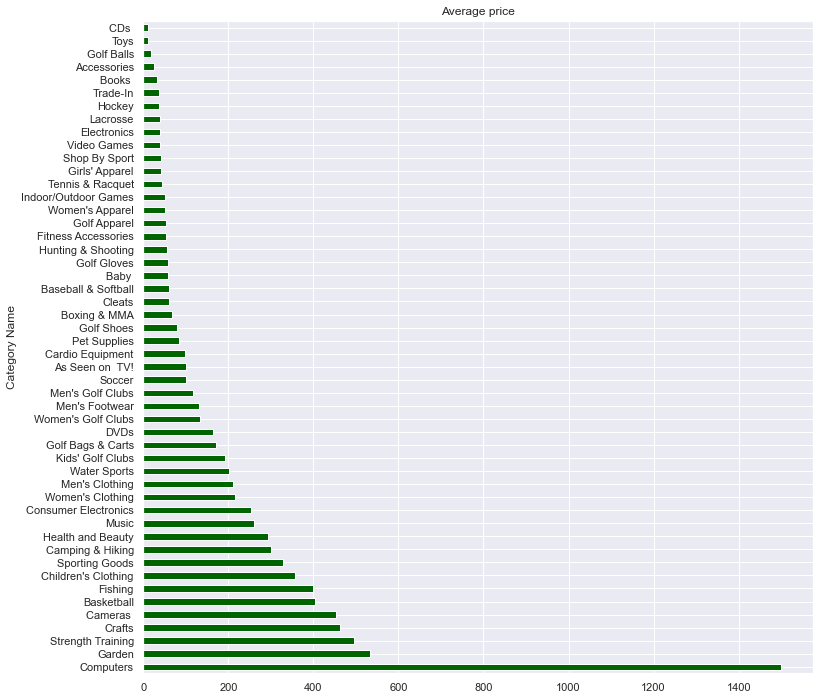

In [120]:
plt.figure(3)
cat['Product Price'].mean().sort_values(ascending=False).plot.barh(figsize=(12,12), title="Average price",color='darkgreen')

In [121]:
data['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [124]:
data['Order Region'].value_counts()

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64

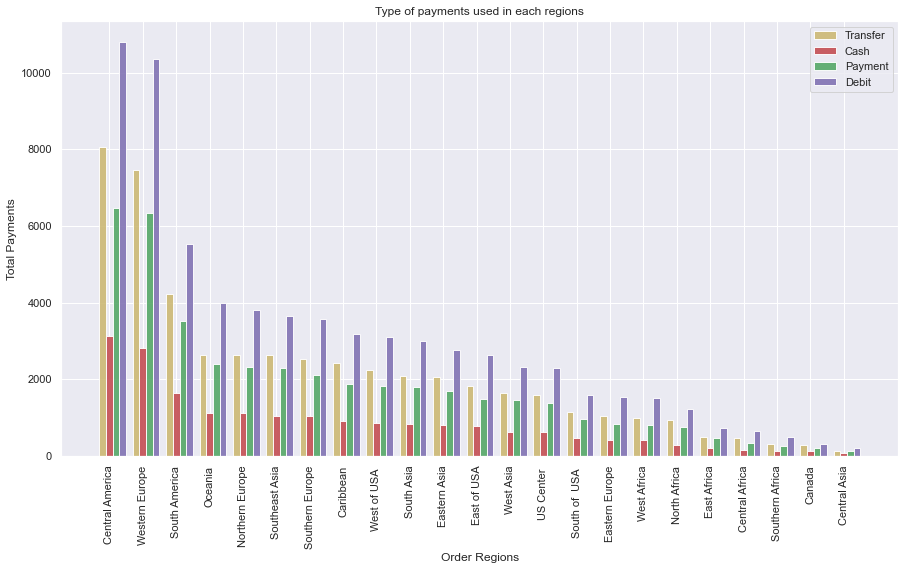

In [125]:
totaltransfer=data[(data['Type'] == 'TRANSFER')]['Order Region'].value_counts()
totalcash=data[(data['Type'] == 'CASH')]['Order Region'].value_counts()
totalpayment=data[(data['Type'] == 'PAYMENT')]['Order Region'].value_counts()
totaldebit=data[(data['Type'] == 'DEBIT')]['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(15,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.9
type1=plt.bar(index,totaltransfer,bar_width,alpha=opacity,color='y',label='Transfer')
type2=plt.bar(index+bar_width,totalcash,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,totalpayment,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,totaldebit,bar_width,alpha=opacity,color='m',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Total Payments')
plt.title('Type of payments used in each regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.show()

In [126]:
data['Benefit per order']

0          91.250000
1        -249.089996
2        -247.779999
3          22.860001
4         134.210007
             ...    
180514     40.000000
180515   -613.770019
180516    141.110001
180517    186.229996
180518    168.949997
Name: Benefit per order, Length: 180519, dtype: float64

Total revenue lost associated with the orders -3883547.345768667


<AxesSubplot:title={'center':'Regions with most loss'}>

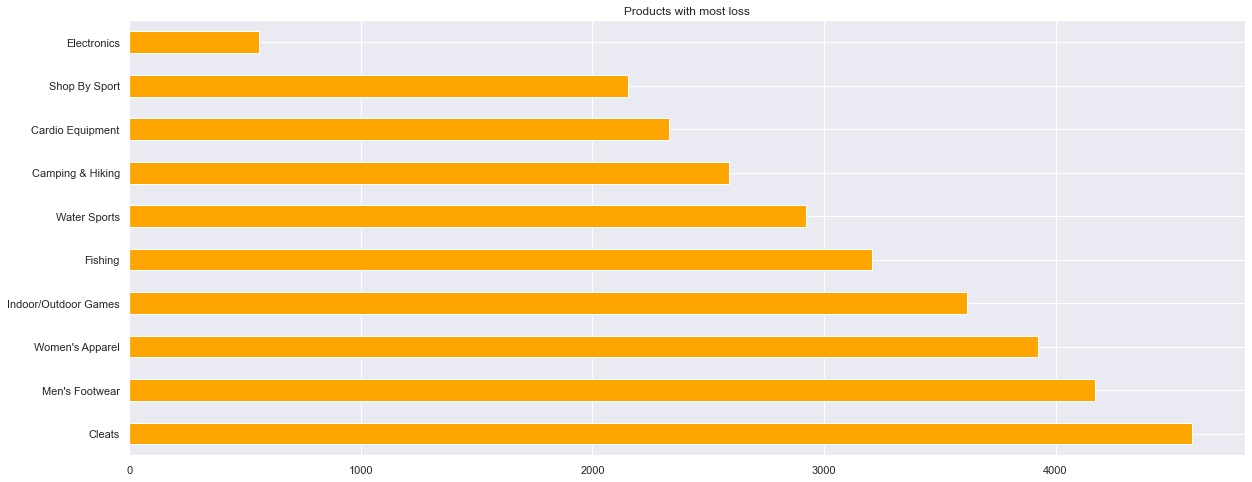

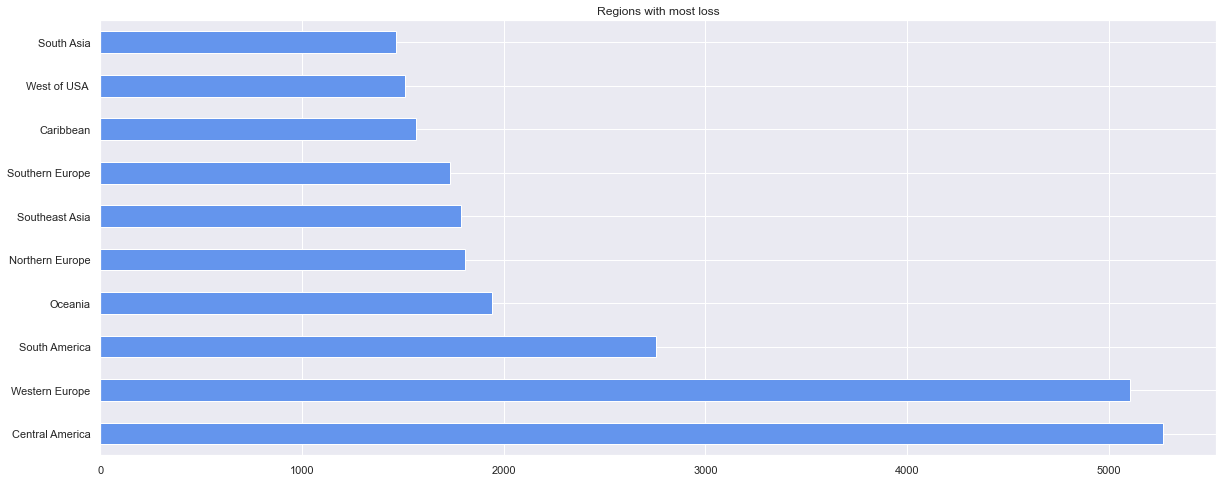

In [127]:
loss = data[(data['Benefit per order']<0)]
print('Total revenue lost associated with the orders',loss['Benefit per order'].sum())
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.barh(figsize=(20,8), title="Products with most loss", color='orange')
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.barh(figsize=(20,8), title="Regions with most loss",color='cornflowerblue')

In [128]:
#1. Fraud in CASH transaction
fraud_cash= data[(data['Type'] =='CASH')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_cash['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

In [129]:
#2. Fraud in TRANSFER transaction
fraud_transfer= data[(data['Type'] == 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_transfer['Order Region'].value_counts()

Western Europe     705
Central America    631
South America      361
West of USA        236
Oceania            229
Southern Europe    223
Caribbean          190
Southeast Asia     187
Northern Europe    170
Eastern Asia       156
East of USA        150
West Asia          147
South Asia         144
US Center          121
North Africa        75
Eastern Europe      74
West Africa         71
South of  USA       66
Southern Africa     32
East Africa         31
Canada              29
Central Africa      28
Central Asia         6
Name: Order Region, dtype: int64

In [130]:
#3. Fraud in DEBIT transaction
fraud_debit= data[(data['Type'] == 'DEBIT')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_debit['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

In [131]:
#4. Fraud in PAYMENT transaction
fraud_payment= data[(data['Type'] == 'PAYMENT')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
fraud_payment['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

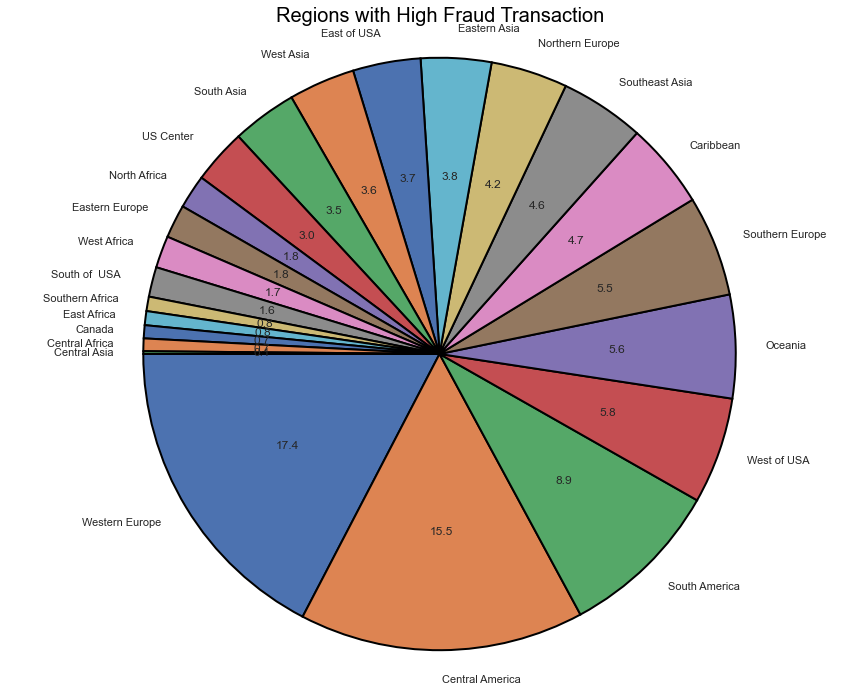

In [132]:
#Visualizing fraud transaction by region using a pie chart for the top 14 regions
#Plotting pie chart with respect to order region
fraud=fraud_transfer['Order Region'].value_counts().plot.pie(figsize=(15,12),
                                                  startangle=180,autopct='%.1f',wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
plt.title("Regions with High Fraud Transaction",size=20,color='black')
plt.ylabel(" ")
fraud.axis('equal')
plt.show()

In [133]:
#CLASSIFICATION

In [136]:
#Dropping the columns that will not be used for classification purpose as it contains irrelevant data
data=df.drop(['Customer Email','Customer Password','Product Status','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)

In [137]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)
data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour

In [138]:
train_data=data.copy()
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)


In [139]:
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier= le.fit_transform(train_data['Market'])
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [140]:
#Using preprocessing library, the necessary column datatypes are be converted to integer for training
le = preprocessing.LabelEncoder()
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

train_data.drop(['Delivery Status','Order Status','order date (DateOrders)'], axis=1, inplace=True)

In [141]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int32  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Id                    180519 non-null  int64  
 7   Category Name                  180519 non-null  int32  
 8   Customer City                  180519 non-null  int32  
 9   Customer Country               180519 non-null  int32  
 10  Customer Id                    180519 non-null  int64  
 11  Customer Segment               180519 non-null  int32  
 12  Customer State                

In [170]:
data['Order Status']

0                COMPLETE
1                 PENDING
2                  CLOSED
3                COMPLETE
4         PENDING_PAYMENT
               ...       
180514             CLOSED
180515           COMPLETE
180516            PENDING
180517    PENDING_PAYMENT
180518    PENDING_PAYMENT
Name: Order Status, Length: 180519, dtype: object

In [142]:
train_data['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

In [143]:
xf=train_data.loc[:, train_data.columns != 'fraud']
yf=train_data['fraud']


In [147]:
#Random OverSampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
# resampling x, y
x_ros, y_ros = ros.fit_resample(xf, yf)

In [148]:
xf_train, xf_test,yf_train,yf_test = train_test_split(x_ros,y_ros,test_size = 0.2,random_state = 42)

In [149]:
#Since there are different variables with multiple different ranges, it is essential to standardize the data
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)


In [150]:
def classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test):
    model_f=model_f.fit(xf_train,yf_train) 
    yf_pred=model_f.predict(xf_test)
    accuracy_f=accuracy_score(yf_pred, yf_test) 
    recall_f=recall_score(yf_pred, yf_test) 
    conf_f=confusion_matrix(yf_test, yf_pred)
    f1_f=f1_score(yf_test, yf_pred)
    print('Model parameters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    

In [151]:
#Logistic Regression
model_f = LogisticRegression(solver='lbfgs',random_state=0)
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model parameters used are : LogisticRegression(random_state=0)
Accuracy of fraud status is        : 93.75912046810139 %
Recall score of fraud status is        : 88.86585951520361 %
Conf Matrix of fraud status is        :
 [[31020  4405]
 [    0 35158]]
F1 score of fraud status is        : 94.10473628564928 %


In [152]:
#Gaussian Naive Bayes
model_f = GaussianNB()
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model parameters used are : GaussianNB()
Accuracy of fraud status is        : 93.75912046810139 %
Recall score of fraud status is        : 88.86585951520361 %
Conf Matrix of fraud status is        :
 [[31020  4405]
 [    0 35158]]
F1 score of fraud status is        : 94.10473628564928 %


In [153]:
#Linear SVC
model_f = svm.LinearSVC()
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model parameters used are : LinearSVC()
Accuracy of fraud status is        : 93.75912046810139 %
Recall score of fraud status is        : 88.86585951520361 %
Conf Matrix of fraud status is        :
 [[31020  4405]
 [    0 35158]]
F1 score of fraud status is        : 94.10473628564928 %


In [154]:
#KNN
model_f = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model parameters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of fraud status is        : 99.35961917175524 %
Recall score of fraud status is        : 98.73069362538612 %
Conf Matrix of fraud status is        :
 [[34973   452]
 [    0 35158]]
F1 score of fraud status is        : 99.36129323988241 %


In [155]:
#Random Forest
model_f = RandomForestClassifier()
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model parameters used are : RandomForestClassifier()
Accuracy of fraud status is        : 99.97024779337801 %
Recall score of fraud status is        : 99.94030529577304 %
Conf Matrix of fraud status is        :
 [[35404    21]
 [    0 35158]]
F1 score of fraud status is        : 99.97014373658246 %


In [156]:
#Decision Tree
model_f = tree.DecisionTreeClassifier()
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Model parameters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 99.77615006446311 %
Recall score of fraud status is        : 99.55261071469023 %
Conf Matrix of fraud status is        :
 [[35267   158]
 [    0 35158]]
F1 score of fraud status is        : 99.77580384255185 %


In [1]:
classification_data = {'Classification Model':  ['Logistic','Gausian Naive bayes','Support Vector Machines','K nearest Neighbour','Random Forest','Decision tree'],
        'Accuracy Score for Fraud Detection':     [93.76,93.76,93.75,99.36,99.97,99.79],
        'Recall Score for Fraud Detection':       [88.86,88.86,88.86,98.73,99.93,99.59],
        'F1 Score for Fraud Detection':           [94.10,94.10,94.10,99.36,99.97,99.79],
        'Time complexity':                      ['O(nd)','O(n*d)','O(n²)','O(knd)','O(n*log(n)*d*k)','O(n*log(n)*d)']}
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection','Time complexity'])

NameError: name 'pd' is not defined